In [1]:
import numpy as np
import torch

### pytorch basic

In [2]:
np.arange(9)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [3]:
torch.arange(9)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [4]:
x = torch.arange(9)
x.dtype

torch.int64

In [5]:
x.reshape(3,3)

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [6]:
torch.rand((3,3))

tensor([[0.0728, 0.0138, 0.1436],
        [0.6498, 0.9955, 0.5952],
        [0.3017, 0.0496, 0.7864]])

In [7]:
torch.zeros((3,3))

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [8]:
torch.ones((3,3))

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

### pytorch basic 2

In [9]:
x * 3

tensor([ 0,  3,  6,  9, 12, 15, 18, 21, 24])

In [10]:
x + 3

tensor([ 3,  4,  5,  6,  7,  8,  9, 10, 11])

In [11]:
range_nums = torch.arange(9).reshape(3,3)
range_nums

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [12]:
# view보다 reshape을 권함!
range_nums.view(-1)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [13]:
x.reshape(3,3)

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

### pytorch basic 3

In [14]:
arr = np.array([1,1,1])
arr

array([1, 1, 1])

In [15]:
# array -> torch
arr_torch = torch.from_numpy(arr)
arr_torch

tensor([1, 1, 1], dtype=torch.int32)

In [16]:
arr_torch.float()

tensor([1., 1., 1.])

In [17]:
device = 'cuda' if torch.cuda. is_available() else 'cpu'

In [18]:
arr_torch.to(device)

tensor([1, 1, 1], dtype=torch.int32)

In [19]:
device

'cpu'

### AutoGrad
- 기울기를 줘서 학습이 되게끔!

In [20]:
x = torch.ones(2,2, requires_grad=True)
x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [21]:
y = x+2
y

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)

In [22]:
print(y.grad_fn)

In [23]:
z = y*y*3
out = z.mean()

In [24]:
print(z,out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward1>)


In [25]:
# back propogation
out.backward()

In [26]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [27]:
print(x.requires_grad)
print((x**2).requires_grad)

True
True


In [28]:
# 기울기 안 구하고! ( faster ) --------> test할때 사용
with torch.no_grad():
    print((x**2).requires_grad)

False


### pytorch data preprocess

In [29]:
from torchvision import datasets, transforms

In [30]:
batch_size = 32
test_batch_size = 32

In [31]:
train_loader = torch.utils.data.DataLoader( 
    datasets.MNIST('dataset/', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize(mean=(0.5, ), std=(0.5, ))
                   ])),
    batch_size=batch_size,
    shuffle=True)

In [32]:
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('dataset', train=False,
                  transform=transforms.Compose([
                      transforms.ToTensor(),
                      transforms.Normalize((0.5, ), (0.5))
                  ])),
    batch_size=test_batch_size,
    shuffle=True)

In [33]:
images, labels = next(iter(train_loader))

In [34]:
# tensorflow : batchsize*(height*width*channel)
# pytorch : batchsize*(channel*height*width)
images.shape

torch.Size([32, 1, 28, 28])

In [35]:
labels.shape

torch.Size([32])

### visualization

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
# 첫 번째 사진 : 1(channel)*28*28
images[0].shape

torch.Size([1, 28, 28])

In [38]:
# squeeze (numpy로 만들기 위해)
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

In [39]:
# numpy화
image = torch_image.numpy()
image.shape

(28, 28)

In [40]:
# 정답은 2
label = labels[0].numpy()
label

array(1, dtype=int64)

In [41]:
label.shape

()

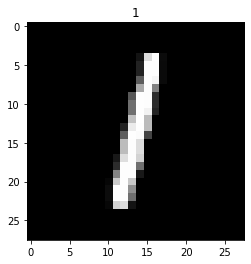

In [42]:
plt.title(label)
plt.imshow(image,'gray') # 1번쨰 image -> squeeze -> numpy화 -> imshow
plt.show()

### example

In [43]:
from PIL import Image

In [44]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [45]:
train_loader = torch.utils.data.DataLoader( 
    datasets.MNIST('dataset/', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       ])),
    batch_size=1,
    shuffle=True)

In [46]:
image, label = next(iter(train_loader))

In [47]:
image.shape, label.shape

(torch.Size([1, 1, 28, 28]), torch.Size([1]))

## Convolution
- in_channels : 받게 될 channel의 개수
- out_channels : 보내고 싶은 channel의 개수
- kernel_size : 만들고 싶은 kernel(weight)의 사이즈

In [48]:
nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [49]:
# 1개 받고, 20개 내보냄
# 5*5 kernel ( stride = 1 )
layer = nn.Conv2d(1,20,5,1).to(torch.device('cpu'))
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

### weight 시각화 위해 slice & numpy화
- weight는 학습가능한 상태이기 때문에, 바로 numpy로 뽑아낼 수 없음
- detach() method : 그래프에서 잠깐 빼서 gradient에 영향을 받지 않게 함!

In [50]:
weight = layer.weight
weight.shape
# 20개의 5*5필터 ( channel수는 1 )

torch.Size([20, 1, 5, 5])

In [51]:
# 오류가 뜸! detach해줘야!
weight.numpy()

RuntimeError: Can't call numpy() on Variable that requires grad. Use var.detach().numpy() instead.

In [52]:
# weight -> detach해주고 numpy화
weight = weight.detach().numpy()
weight

array([[[[-7.40956366e-02, -7.47417212e-02,  9.68423933e-02,
          -2.61971653e-02,  1.64206609e-01],
         [ 1.96018443e-01, -8.05956125e-02,  8.06747526e-02,
          -6.54949248e-02,  4.84516621e-02],
         [ 1.30167857e-01,  1.22671887e-01,  1.36030778e-01,
          -2.94992179e-02, -7.02195913e-02],
         [ 1.10882863e-01, -1.16760038e-01,  1.32091895e-01,
           1.94466934e-01, -6.66585267e-02],
         [-8.46610591e-02, -1.39089942e-01,  1.13916293e-01,
          -9.75791961e-02,  1.12618193e-01]]],


       [[[-8.33172575e-02,  9.67342407e-02,  7.16807395e-02,
          -1.99444756e-01,  9.89617854e-02],
         [ 1.58150509e-01, -1.19514517e-01, -6.35710955e-02,
          -2.45701969e-02, -1.58517122e-01],
         [-6.81465864e-02, -3.01504582e-02, -1.63415864e-01,
           1.76807195e-02, -1.53176740e-01],
         [-1.93738222e-01,  1.80860057e-01, -6.80790693e-02,
           9.98565555e-03, -4.43190634e-02],
         [-2.77297795e-02,  8.82128626e-02

In [53]:
weight.shape # 20개의 filter / 1개의 channel / 5*5

(20, 1, 5, 5)

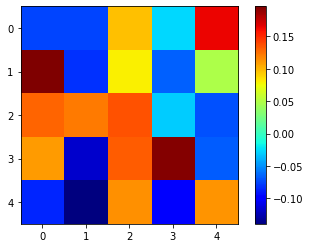

In [54]:
# 그 중, 1개의 filter 가져오기
plt.imshow(weight[0,0,:,:], 'jet')
plt.colorbar()
plt.show()

In [55]:
# (1개의) 20 channel를 가진 24*24 output나옴
output_data = layer(image)

print(output_data.shape)
output_data

torch.Size([1, 20, 24, 24])


tensor([[[[-0.1818, -0.1818, -0.1818,  ..., -0.1818, -0.1818, -0.1818],
          [-0.1818, -0.1818, -0.1818,  ..., -0.1818, -0.1818, -0.1818],
          [-0.1818, -0.1818, -0.1818,  ..., -0.1818, -0.1818, -0.1818],
          ...,
          [-0.1818, -0.1818, -0.1818,  ..., -0.1818, -0.1818, -0.1818],
          [-0.1818, -0.1818, -0.1818,  ..., -0.1818, -0.1818, -0.1818],
          [-0.1818, -0.1818, -0.1818,  ..., -0.1818, -0.1818, -0.1818]],

         [[-0.0289, -0.0289, -0.0289,  ..., -0.0289, -0.0289, -0.0289],
          [-0.0289, -0.0289, -0.0289,  ..., -0.0289, -0.0289, -0.0289],
          [-0.0289, -0.0289, -0.0289,  ..., -0.0289, -0.0289, -0.0289],
          ...,
          [-0.0289, -0.0289, -0.0289,  ..., -0.0289, -0.0289, -0.0289],
          [-0.0289, -0.0289, -0.0289,  ..., -0.0289, -0.0289, -0.0289],
          [-0.0289, -0.0289, -0.0289,  ..., -0.0289, -0.0289, -0.0289]],

         [[-0.0333, -0.0333, -0.0333,  ..., -0.0333, -0.0333, -0.0333],
          [-0.0333, -0.0333, -

In [56]:
output_data = output_data.data

In [57]:
# numpy화
output = output_data.cpu().numpy()
output.shape

(1, 20, 24, 24)

In [58]:
# (input으로 넣었었던) image를 numpy화 해봄! 
image_arr = image.numpy()
image_arr.shape

(1, 1, 28, 28)

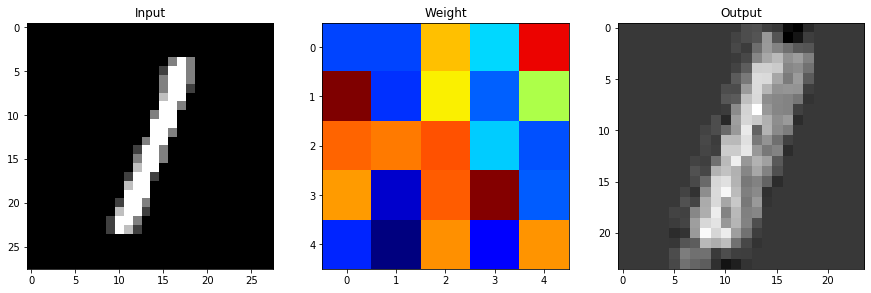

In [59]:
plt.figure(figsize=(15,30))

plt.subplot(131)
plt.title('Input')
plt.imshow(np.squeeze(image_arr), 'gray') # squeeze해줘야!

plt.subplot(132)
plt.title('Weight')
plt.imshow(weight[0,0,:,:], 'jet') # 한개의 filter 예시로 시각화

plt.subplot(133)
plt.title('Output')
plt.imshow(output[0,0,:,:], 'gray') # 20개의 channel중, 하나의 channel output 예시로 시각화

plt.show()

### Pooling

In [60]:
image.shape

torch.Size([1, 1, 28, 28])

In [61]:
pool = F.max_pool2d(image,2,2)
pool.shape

torch.Size([1, 1, 14, 14])

In [62]:
pool_arr = pool.numpy() # input을 바로 weight(fliter)에 넣지 않고, pooling 먼저함! 
pool_arr.shape # size줄어듬

(1, 1, 14, 14)

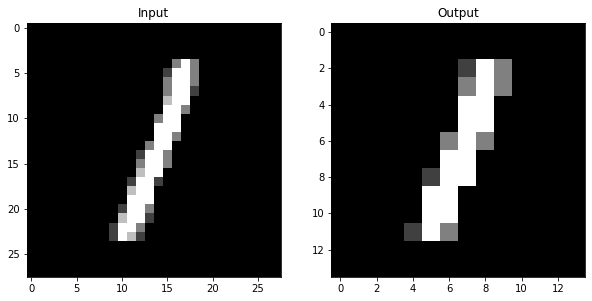

In [63]:
plt.figure(figsize=(10,15))
plt.subplot(121)
plt.title('Input')
plt.imshow(np.squeeze(image_arr),'gray') # input 이미지

plt.subplot(122)
plt.title('Output')
plt.imshow(np.squeeze(pool_arr), 'gray') # pooling후의 이미지
plt.show()

### Linear
- nn.Linear는 2d가 아닌 1d만 들어가기 때문에, view() 1D로 펼쳐줘야함

In [64]:
image.shape # input data의 shape이다

torch.Size([1, 1, 28, 28])

In [65]:
flatten = image.view(1,28*28) # 앞에 (1 ,x)처럼 1은 남겨줘야함! 저기 1은 batch_size니까 유지해줘야함.
flatten.shape

torch.Size([1, 784])

In [66]:
lin = nn.Linear(784,10)(flatten) # 784개 받고 10개 내놓음
lin.shape

torch.Size([1, 10])

In [67]:
lin

tensor([[ 0.1667, -0.1510,  0.0926, -0.0344,  0.1887, -0.1371,  0.0805, -0.0683,
         -0.1886,  0.3930]], grad_fn=<AddmmBackward>)

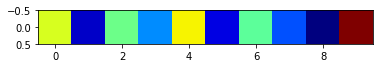

In [68]:
plt.imshow(lin.detach().numpy(), 'jet')
plt.show()

### Softmax
- 결과를 numpy로 꺼내기 위해선, weight가 담긴 Linear에 weight를 꺼줘야함

In [69]:
with torch.no_grad():
    flatten = image.view(1, 28*28)    # 1. input image 쭉 펴줌
    lin = nn.Linear(784,10)(flatten)   # 2. Linear 통해 784->10
    softmax = F.softmax(lin, dim=1) # 3. Softmax function

In [70]:
softmax

tensor([[0.0952, 0.0932, 0.0973, 0.0966, 0.1018, 0.0916, 0.1081, 0.0854, 0.1188,
         0.1119]])

In [71]:
np.sum(softmax.numpy())

1.0

## Layer 쌓기

In [72]:
class Net(nn.Module) :
    def __init__(self): # weight가 있는 내용들
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1,20,5,1)
        self.conv2 = nn.Conv2d(20,50,5,1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500,10)
    
    def forward(self,x):
        # feature extraction
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x,2,2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x,2,2)
        print(x.shape)
        
        # FC
        #x = x.view(-1,4*4*50) # batch size로 몇개 받을 지 모르니, -1로 설정

In [73]:
model=Net()
result = model.forward(image)

torch.Size([1, 50, 4, 4])


- 아하, 50*4*4이구나! size 파악 완료

In [74]:
class Net(nn.Module) :
    def __init__(self): # weight가 있는 내용들
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1,20,5,1)
        self.conv2 = nn.Conv2d(20,50,5,1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500,10)
    
    def forward(self,x):
        # feature extraction
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x,2,2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x,2,2)
        
        # FC
        x = x.view(-1,4*4*50) # batch size로 몇개 받을 지 모르니, -1로 설정
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x,dim=1)

In [75]:
model = Net()

In [76]:
result = model.forward(image)

In [77]:
result

tensor([[-2.2917, -2.3262, -2.2969, -2.2781, -2.2978, -2.2875, -2.3648, -2.2715,
         -2.3103, -2.3043]], grad_fn=<LogSoftmaxBackward>)

## Optimization

In [78]:
model = Net().to(device)

In [79]:
optimizer = optim.Adam(model.parameters(), lr=0.001 )

#### param들 확인
- weight, bias 순으로 보여줌

In [80]:
params = list(model.parameters())

for i in range(8):
    print(params[i].size())

torch.Size([20, 1, 5, 5])
torch.Size([20])
torch.Size([50, 20, 5, 5])
torch.Size([50])
torch.Size([500, 800])
torch.Size([500])
torch.Size([10, 500])
torch.Size([10])


## Befor Training....
- train mode로 변환!
- 이유? Conv또는 Linear 뿐만 아니라, Dropout & BN과 같이 param을 가진 layer들도 학습하기 위해 준비

In [81]:
model.train()

Net(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)

In [82]:
seed = 1
batch_size = 64
test_batch_size = 64
no_cuda = False

In [83]:
use_cuda = not no_cuda and torch.cuda. is_available()
device = torch.device('cuda' if use_cuda else 'cpu')

In [101]:
torch.manual_seed(seed)

train_loader = torch.utils.data.DataLoader( 
    datasets.MNIST('dataset', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.5, ), (0.5,))
                       ])),
    batch_size=batch_size,
    shuffle=True)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('dataset', train=False,
                  transform=transforms.Compose([
                      transforms.ToTensor(),
                      transforms.Normalize((0.5, ), (0.5,))
                  ])),
    batch_size=test_batch_size,
    shuffle=True)

In [102]:
data, target = next(iter(train_loader))

In [103]:
data.shape

torch.Size([64, 1, 28, 28])

In [104]:
data, target = data.to(device), target.to(device)

In [105]:
data.shape # cpu에 탑재

torch.Size([64, 1, 28, 28])

- optimizer clear 해주기

In [106]:
optimizer.zero_grad()

In [107]:
output = model(data)

In [108]:
loss = F.nll_loss(output, target) #negative log likelihood

In [109]:
loss.backward() # back-prop으로 기울기 계산

In [110]:
optimizer.step() # update하기

## Start Training
- 위의 최적화 과정을 반복한 뒤, 학습 시작

In [111]:
epochs = 1
log_interval = 100

In [112]:
for epoch in range(1, epochs+1):
    # train mode
    model.train()
    for batch_idx, (data,target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        
        if batch_idx % log_interval == 0:
            print('Train Epoch : {} [ {}/{} ({:.0f}%)]\tLoss : {:.6f}'.format(
                epoch, batch_idx*len(data), len(train_loader.dataset),
                100*(batch_idx)/len(train_loader), loss.item()
            ))

Train Epoch : 1 [ 0/60000 (0%)]	Loss : 2.295042
Train Epoch : 1 [ 6400/60000 (11%)]	Loss : 0.273440
Train Epoch : 1 [ 12800/60000 (21%)]	Loss : 0.079954
Train Epoch : 1 [ 19200/60000 (32%)]	Loss : 0.053701
Train Epoch : 1 [ 25600/60000 (43%)]	Loss : 0.020478
Train Epoch : 1 [ 32000/60000 (53%)]	Loss : 0.095894
Train Epoch : 1 [ 38400/60000 (64%)]	Loss : 0.127567
Train Epoch : 1 [ 44800/60000 (75%)]	Loss : 0.046777
Train Epoch : 1 [ 51200/60000 (85%)]	Loss : 0.115824
Train Epoch : 1 [ 57600/60000 (96%)]	Loss : 0.035777


## Evaluation
- 이번에는 model.eval()모드로 설정
- BatchNorm 이나 DropOut 같은 layer들을 잠금

In [113]:
model.eval()

Net(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)

- autograd engine (즉 back prop이나 grad 계산 )등을 꺼서 memory usage줄이고 속도 높임

In [114]:
test_loss = 0
correct = 0

with torch.no_grad(): # 계산 끄기
    data, target = next(iter(test_loader))
    data, target = data.to(device), target.to(device)
    output = model(data)
    
    test_loss += F.nll_loss(output, target, reduction='sum').item() # item : 담는다는 뜻
    
    pred = output.argmax(dim=1, keepdim=True)
    correct = pred.eq(target.view_as(pred)).sum().item() # item : 담는다는 뜻

In [116]:
correct

63

In [117]:
test_loss

1.2299838066101074

In [125]:
# 꽤 높은 정확도
correct / len(pred.eq(target.view_as(pred)))

0.984375

In [126]:
test_loss /= len(test_loader.dataset)
test_loss

0.00012299838066101075

In [128]:
model.eval()
test_loss = 0
correct = 0
with torch.no_grad():
    for data, target in test_loader :
        data, target = data.to(device), target.to(device)
        output = model(data)
        test_loss += F.nll_loss(output, target, reduction='sum').item()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()
    
test_loss /= len(test_loader.dataset)

print('\nTest set : Average Loss : {:.4f}, Accuracy : {}/{} ({:.0f}&)\n'.format(
    test_loss, correct, len(test_loader.dataset), 100*(correct/len(test_loader.dataset))))


Test set : Average Loss : 0.0348, Accuracy : 9894/10000 (99&)



## 종합
- 1 epoch에서 train & test 반복!